In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')



In [5]:
df_train = pd.read_csv('/train.csv')
train_length = len(df_train)
df_test = pd.read_csv('/home/parag/Downloads/test.csv')
df_train.rename(columns = {'Personality (Class label)':'Personality'}, inplace = True) 
df_test.rename(columns = {'Personality (class label)':'Personality'}, inplace = True) 
df = pd.concat([df_train, df_test])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [6]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

In [ ]:
# Imputing values

In [7]:
import random
def impute(df):
    persn=df['Personality']
    if persn==0:
        return int(random.choice([1, 2, 3,4,5,6]))
    if persn==1:
        return int(random.choice([6,7,8,9,10]))
    if persn==2:
        return int(random.choice([7,8,9,10]))
    if persn==3:
        return int(random.choice([5,6,7,8]))   
    if persn==4:
        return int(random.choice([1, 2, 3,4,5]))   
df['openness']=df.apply(lambda x: impute(x),axis=1)


In [8]:
def impute(df):
    persn=df['Personality']
    if persn==0:
        return int(random.choice([2, 3,4,5,6]))
    if persn==1:
        return int(random.choice([1,2, 3,4]))
    if persn==2:
        return int(random.choice([1,2, 3,4]))
    if persn==3:
        return int(random.choice([3,4,5,6,7]))   
    if persn==4:
        return int(random.choice([6,7,8,9,10]))  
df['neuroticism']=df.apply(lambda x: impute(x),axis=1)

In [9]:
def impute(df):
    persn=df['Personality']
    if persn==0:
        return int(random.choice([5,6,7,8]))
    if persn==1:
        return int(random.choice([6,7,8,9,10]))
    if persn==2:
        return int(random.choice([7,8,9,10]))
    if persn==3:
        return int(random.choice([7,8,9,10]))   
    if persn==4:
        return int(random.choice([3,4,5,6,7])) 
df['conscientiousness']=df.apply(lambda x: impute(x),axis=1)

In [10]:
def impute(df):
    persn=df['Personality']
    if persn==0:
        return int(random.choice([7,8,9,10]))
    if persn==1:
        return int(random.choice([5,6,7,8]))
    if persn==2:
        return int(random.choice([3,4,5,6,7,8]))
    if persn==3:
        return int(random.choice([5,6,7,8,9]))   
    if persn==4:
        return int(random.choice([3,4,5,6,7])) 
df['agreeableness']=df.apply(lambda x: impute(x),axis=1)

In [11]:
def impute(df):
    persn=df['Personality']
    if persn==0:
        return int(random.choice([5,6,7,8]))
    if persn==1:
        return int(random.choice([7,8,9,10]))
    if persn==2:
        return int(random.choice([7,8,9,10]))
    if persn==3:
        return int(random.choice([5,6,7,8,9]))   
    if persn==4:
        return int(random.choice([5,6,7,8])) 
df['extraversion']=df.apply(lambda x: impute(x),axis=1)

Before I preprocess anything, I'll do some exploration. I will draw a box-and-whiskers plot for each Big Five trait, to roughly see the distribution of each trait within each of the personality label categories.

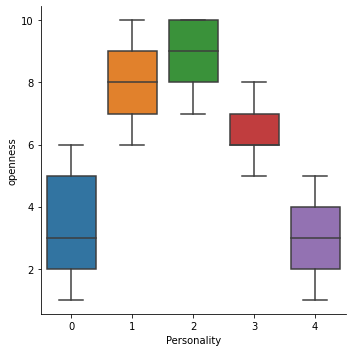

In [12]:
sns.catplot(x="Personality", y="openness", kind="box", data=df)

Each personality label has very similar distributions of 'openness', besides 'lively' which has a distribution which seems a bit more concentrated at above average values.

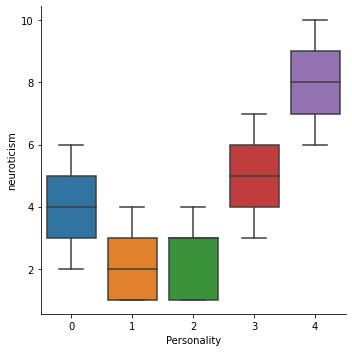

In [13]:
sns.catplot(x="Personality", y="neuroticism", kind="box", data=df)

'neuroticism' looks a bit more useful for us, in as much as it has somewhat different distributions within each personality label.

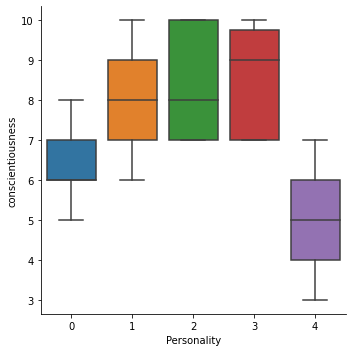

In [14]:
sns.catplot(x="Personality", y="conscientiousness", kind="box", data=df)

'conscientiousness' is distributed quite similarly within each personality label, although the 'extraverted' and 'responsible' labels have more individuals with a below average rating.

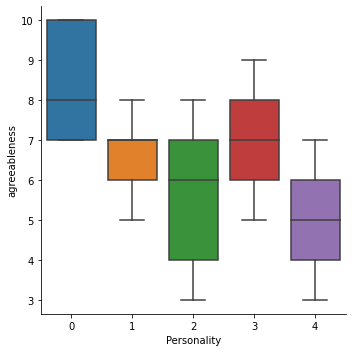

In [15]:
sns.catplot(x="Personality", y="agreeableness", kind="box", data=df)

'agreeableness' has basically identical distributions for each personality label, and is thus unlikely to be very useful when making predictions.

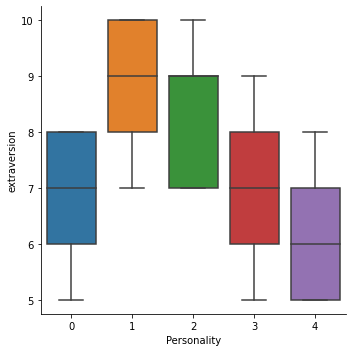

In [16]:
sns.catplot(x="Personality", y="extraversion", kind="box", data=df)

In [ ]:
#checking nan values

In [17]:
df.isnull().sum().sum()

1

Only one row with a null value, in 'Gender'. I'll quickly impute it, in a somewhat ad-hoc manner. I'll group our dataframe by 'Personality' and 'Age', and see what the mean age value is for 'serious' 21-year-olds:

In [18]:
df.groupby(by=['Personality', 'Age']).mean().loc[4]

,Gender,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,,,,,,
17,0.375000,2.958333,7.791667,4.666667,5.375000,6.291667
18,0.531250,2.859375,8.046875,5.078125,4.656250,6.406250
19,0.506024,2.963855,7.746988,5.012048,4.927711,6.518072
20,0.250000,3.125000,8.175000,4.925000,5.175000,6.500000
21,0.406250,2.848485,8.393939,5.151515,4.666667,6.424242
22,0.476190,3.428571,8.095238,5.571429,5.666667,6.285714
23,0.133333,3.200000,8.600000,5.200000,4.733333,6.333333
24,0.400000,3.333333,7.800000,5.266667,4.200000,6.400000
25,0.500000,4.000000,7.500000,4.875000,5.750000,6.500000


The mean is closer to 0 i.e. closer to the male numerical value. I'll therefore impute the missing value with 0.

In [19]:
df.at[449, 'Gender'] = 0

In [20]:
df.isnull().sum().sum()

0

I'll now go back to do some more exploration: let's take a look at the correlation matrix of our data. This will allow us to see if there are any clear linear relationships between any of our values, and more importantly between any of our features and the label. We already have a rough idea from our box-and-whiskers plots that no Big Five trait seems to have a strong relationship with any of the personality labels, but looking at a correlation matrix may still be useful.

<AxesSubplot:>

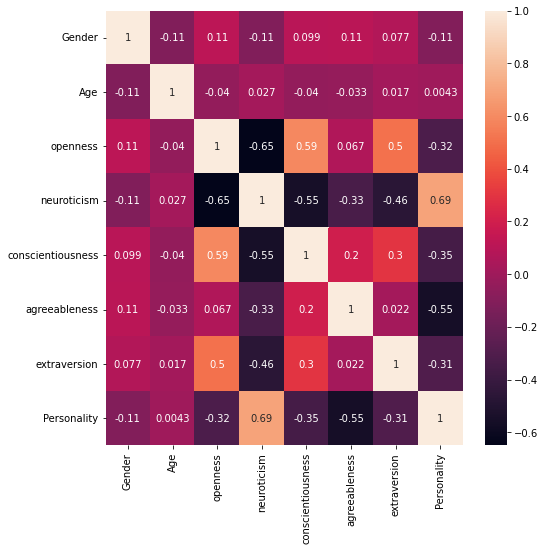

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(df.corr(), annot=True,ax=ax)

Alas, it's now clear that there aren't any strong linear relationships at play: the strongest correlations with regards to our label are with 'Gender' and 'neuroticism', and even those are quite weak. This does not discount the possibility of non-linear relationships that could allow a model to make good predictions, but it's not an encouraging start. Still, let us press on!

For our models to work well, we should make sure that our data isn't too skewed:

'openness' and 'agreeableness' have a negative skew below -0.5, so it's probably a good idea to unskew these columns. I'll use a square root transformation over a reflection of these columns:

At this point, I will split the unified database back into the training and the test set, and then scale them separately:

In [22]:
df_train = df[:train_length]
df_test = df[train_length:]
Y, X = df_train.values[:,-1], df_train.values[:,:-1]
Y_test, X_test = df_test.values[:,-1], df_test.values[:,:-1]


In [23]:
X_test.shape

(315, 7)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [26]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [27]:
Y_test_dummy=np_utils.to_categorical(Y_test)

In [52]:
Y_test_dummy

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [28]:
# build a model
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(16, activation='relu')) # input shape is (features,)
model.add(Dense(8, activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 965
Trainable params: 965
Non-trainable params: 0
_________________________________________________________________


In [29]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=5000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5000
57/57 [==============================] - 13s 7ms/step - loss: 2.4027 - accuracy: 0.2052 - val_loss: 1.3390 - val_accuracy: 0.3873
Epoch 2/5000
57/57 [==============================] - 0s 1ms/step - loss: 1.1720 - accuracy: 0.5945 - val_loss: 1.0330 - val_accuracy: 0.5352
Epoch 3/5000
57/57 [==============================] - 0s 1ms/step - loss: 0.9011 - accuracy: 0.6715 - val_loss: 0.8268 - val_accuracy: 0.6901
Epoch 4/5000
57/57 [==============================] - 0s 1ms/step - loss: 0.7876 - accuracy: 0.7093 - val_loss: 0.7162 - val_accuracy: 0.6972
Epoch 5/5000
57/57 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.7094 - val_loss: 0.6758 - val_accuracy: 0.6972
Epoch 6/5000
57/57 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.7541 - val_loss: 0.6582 - val_accuracy: 0.7254
Epoch 7/5000
57/57 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7506 - val_loss: 0.6048 - val_accuracy: 0.7254
Epoch

57/57 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7598 - val_loss: 0.4747 - val_accuracy: 0.7394
Epoch 59/5000
57/57 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7933 - val_loss: 0.4548 - val_accuracy: 0.7465
Epoch 60/5000
57/57 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8368 - val_loss: 0.5231 - val_accuracy: 0.7676
Epoch 61/5000
57/57 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8370 - val_loss: 0.4581 - val_accuracy: 0.7676
Epoch 62/5000
57/57 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8184 - val_loss: 0.4425 - val_accuracy: 0.7676
Epoch 63/5000
57/57 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8004 - val_loss: 0.4919 - val_accuracy: 0.7676
Epoch 64/5000
57/57 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7809 - val_loss: 0.4791 - val_accuracy: 0.7746
Epoch 65/5000

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_test) # see how the model did!




In [31]:

matrix = confusion_matrix(Y_test_dummy.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])

array([[ 20,   0,   0,   1,   0],
       [  1,  51,  21,   4,   0],
       [  0,   2,  18,   4,   0],
       [  4,   3,   1,  31,   1],
       [  2,   0,   0,   0, 151]])

In [33]:
#checking accuracy
print(classification_report(Y_test_dummy.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.91      0.66      0.77        77
           2       0.45      0.75      0.56        24
           3       0.78      0.78      0.78        40
           4       0.99      0.99      0.99       153

    accuracy                           0.86       315
   macro avg       0.77      0.83      0.79       315
weighted avg       0.89      0.86      0.87       315



In [ ]:
#saving the final model weights

In [34]:
model.save('/home/parag/other_project/personality_pre')

INFO:tensorflow:Assets written to: /home/parag/other_project/personality_pre/assets


In [35]:
# loading weights
model1 = keras.models.load_model('/home/parag/other_project/personality_pre')

In [37]:
# testing on one sample
result=model1.predict([[ 0., 17.,  5.,  6.,  4.,  5.,  5.]]).argmax(axis=1)

In [39]:
list(result)[0]

4